1. Detektion der R-Zacke und Berechnung der Herzfrequenz


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sps
import Lab2Functions as ekg


## Importieren der Daten aus Aufgabe 4

In [ ]:
#Daten Markus
df_01 = pd.read_csv('data/Lab2_Aufgabe4_Markus.csv', sep = ';')
df_01 = df_01.dropna()
time_01 = df_01['time'] / 1000
ecg_01 = df_01['mV']
#Daten Matti
df_03 = pd.read_csv('data/Lab2_Aufgabe4_Matti.csv', sep = ';')
df_03 = df_03.dropna()
time_03 = df_03['time'] / 1000
ecg_03 = df_03['mV']
#Daten Juian
df_04 = pd.read_csv('data/Lab2_Aufgabe4_Julian.csv', sep = ';')
df_04 = df_04.dropna()
time_04 = df_04['time'] / 1000
time_04 = time_04 - time_04[0]
ecg_04 = df_04['mV']

0           0.000
1           0.002
2           0.004
3           0.006
4           0.008
           ...   
297318    604.075
297319    604.077
297320    604.079
297321    604.081
297322    604.083
Name: time, Length: 297323, dtype: float64


## Filtern der Daten um das Rauschen zu minimieren

In [12]:
def butter_lowpass_filter(Wn, ecg): # Wn = 2*fg / fs)
    b , a = sps.butter(4, Wn, 'low', analog=False) 
    ecg_filtered = sps.filtfilt(b, a, ecg)
    return ecg_filtered

ecg_filtered_01 = butter_lowpass_filter(0.16, ecg_01)  
ecg_filtered_02 = butter_lowpass_filter(0.16, ecg_02)
ecg_filtered_03 = butter_lowpass_filter(0.16, ecg_03) 

## Aufgabe 3


In [ ]:
#Daten Markus
df_01 = pd.read_csv('data/Lab2_Aufgabe4_Markus.csv', sep = ';')
df_01 = df_01.dropna()
time_01 = df_01['time'] / 1000
ecg_01 = df_01['mV']
#Daten Jannis
df_02 = pd.read_csv('data/Lab2_Aufgabe4_Jannis.csv', sep = ';')
df_02 = df_02.dropna()
time_02 = df_02['time'] / 1000
ecg_02 = df_02['mV']
#Daten Matti
df_03 = pd.read_csv('data/Lab2_Aufgabe4_Matti.csv', sep = ';')
df_03 = df_03.dropna()
time_03 = df_03['time'] / 1000
ecg_03 = df_03['mV']

def butter_lowpass_filter(Wn, ecg): # Wn = 2*fg / fs)
    b , a = sps.butter(4, Wn, 'low', analog=False) 
    ecg_filtered = sps.filtfilt(b, a, ecg)
    return ecg_filtered

ecg_filtered_01 = butter_lowpass_filter(0.16, ecg_01)  
ecg_filtered_02 = butter_lowpass_filter(0.16, ecg_02)
ecg_filtered_03 = butter_lowpass_filter(0.16, ecg_03) 

In [ ]:
time_plot = np.where(time_01 < 10)[0]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
fig.suptitle('Orginal ECG and filtered ECG')
#Plotten Daten Markus
ax1.plot(time_01[time_plot], ecg_01[time_plot], label='ECG')
ax1.plot(time_01[time_plot], ecg_filtered_01[time_plot], label='ECG filtered')
ax1.set_title('Markus')
ax1.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax1.legend()
#Plotten Daten Jannis
ax2.plot(time_02[time_plot], ecg_02[time_plot], label='ECG')
ax2.plot(time_02[time_plot], ecg_filtered_02[time_plot], label='ECG filtered')
ax2.set_title('Jannis')
ax2.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax2.legend()
#Plotten Daten Matti
ax3.plot(time_03[time_plot], ecg_03[time_plot], label='ECG')
ax3.plot(time_03[time_plot], ecg_filtered_03[time_plot], label='ECG filtered')
ax3.set_title('Matti')
ax3.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax3.legend()

In [ ]:


# Annahme: time_03 und ecg_filtered_03 sind definiert
# Daten auf die ersten 5 Sekunden beschränken
time_limit = 5
time_plot_03 = np.where(time_03 < time_limit)[0]
filtered_time = time_03[time_plot_03]
filtered_ecg = ecg_filtered_03[time_plot_03]

# Zeitpunkte für Markierungen
p_wave_times = [0.21, 1.15, 2, 2.86, 3.74, 4.55]  # Beispielzeitpunkte für P-Wellen
qrs_regions = [(0.28, 0.46), (1.2, 1.38), (2.07, 2.24), (2.93,3.09),(3.81, 3.98),(4.63, 4.8)]  # QRS-Bereiche (Start, Ende)
t_wave_times = [0.58, 1.5, 2.37, 3.23, 4.11, 4.93]  # Beispielzeitpunkte für T-Wellen

# Indizes für die Markierung berechnen
p_wave_indices = [np.where(filtered_time >= t)[0][0] for t in p_wave_times]
qrs_start_indices = [np.where(filtered_time >= start)[0][0] for start, _ in qrs_regions]
qrs_end_indices = [np.where(filtered_time <= end)[0][-1] for _, end in qrs_regions]
t_wave_indices = [np.where(filtered_time >= t)[0][0] for t in t_wave_times]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_time, filtered_ecg, label='Filtered ECG', color='orange')

# P-Wellen markieren
for idx in p_wave_indices:
    plt.scatter(filtered_time[idx], filtered_ecg[idx], color='blue', marker='X', label='P-wave' if idx == p_wave_indices[0] else None)

# QRS-Komplexe markieren
for start_idx, end_idx in zip(qrs_start_indices, qrs_end_indices):
    plt.axvspan(filtered_time[start_idx], filtered_time[end_idx], color='red', alpha=0.3, label='QRS Complex' if start_idx == qrs_start_indices[0] else None)

# T-Wellen markieren
for idx in t_wave_indices:
    plt.scatter(filtered_time[idx], filtered_ecg[idx], color='green', marker='X', label='T-wave' if idx == t_wave_indices[0] else None)

# Labels, Titel und Legende
plt.xlabel('Time [s]')
plt.ylabel('ECG [mV]')
plt.title('ECG with Multiple Markers (P-wave, QRS Complex, T-wave)')
plt.legend()
plt.grid(True)
plt.show()


## Plotten orginal gegen gefiltert

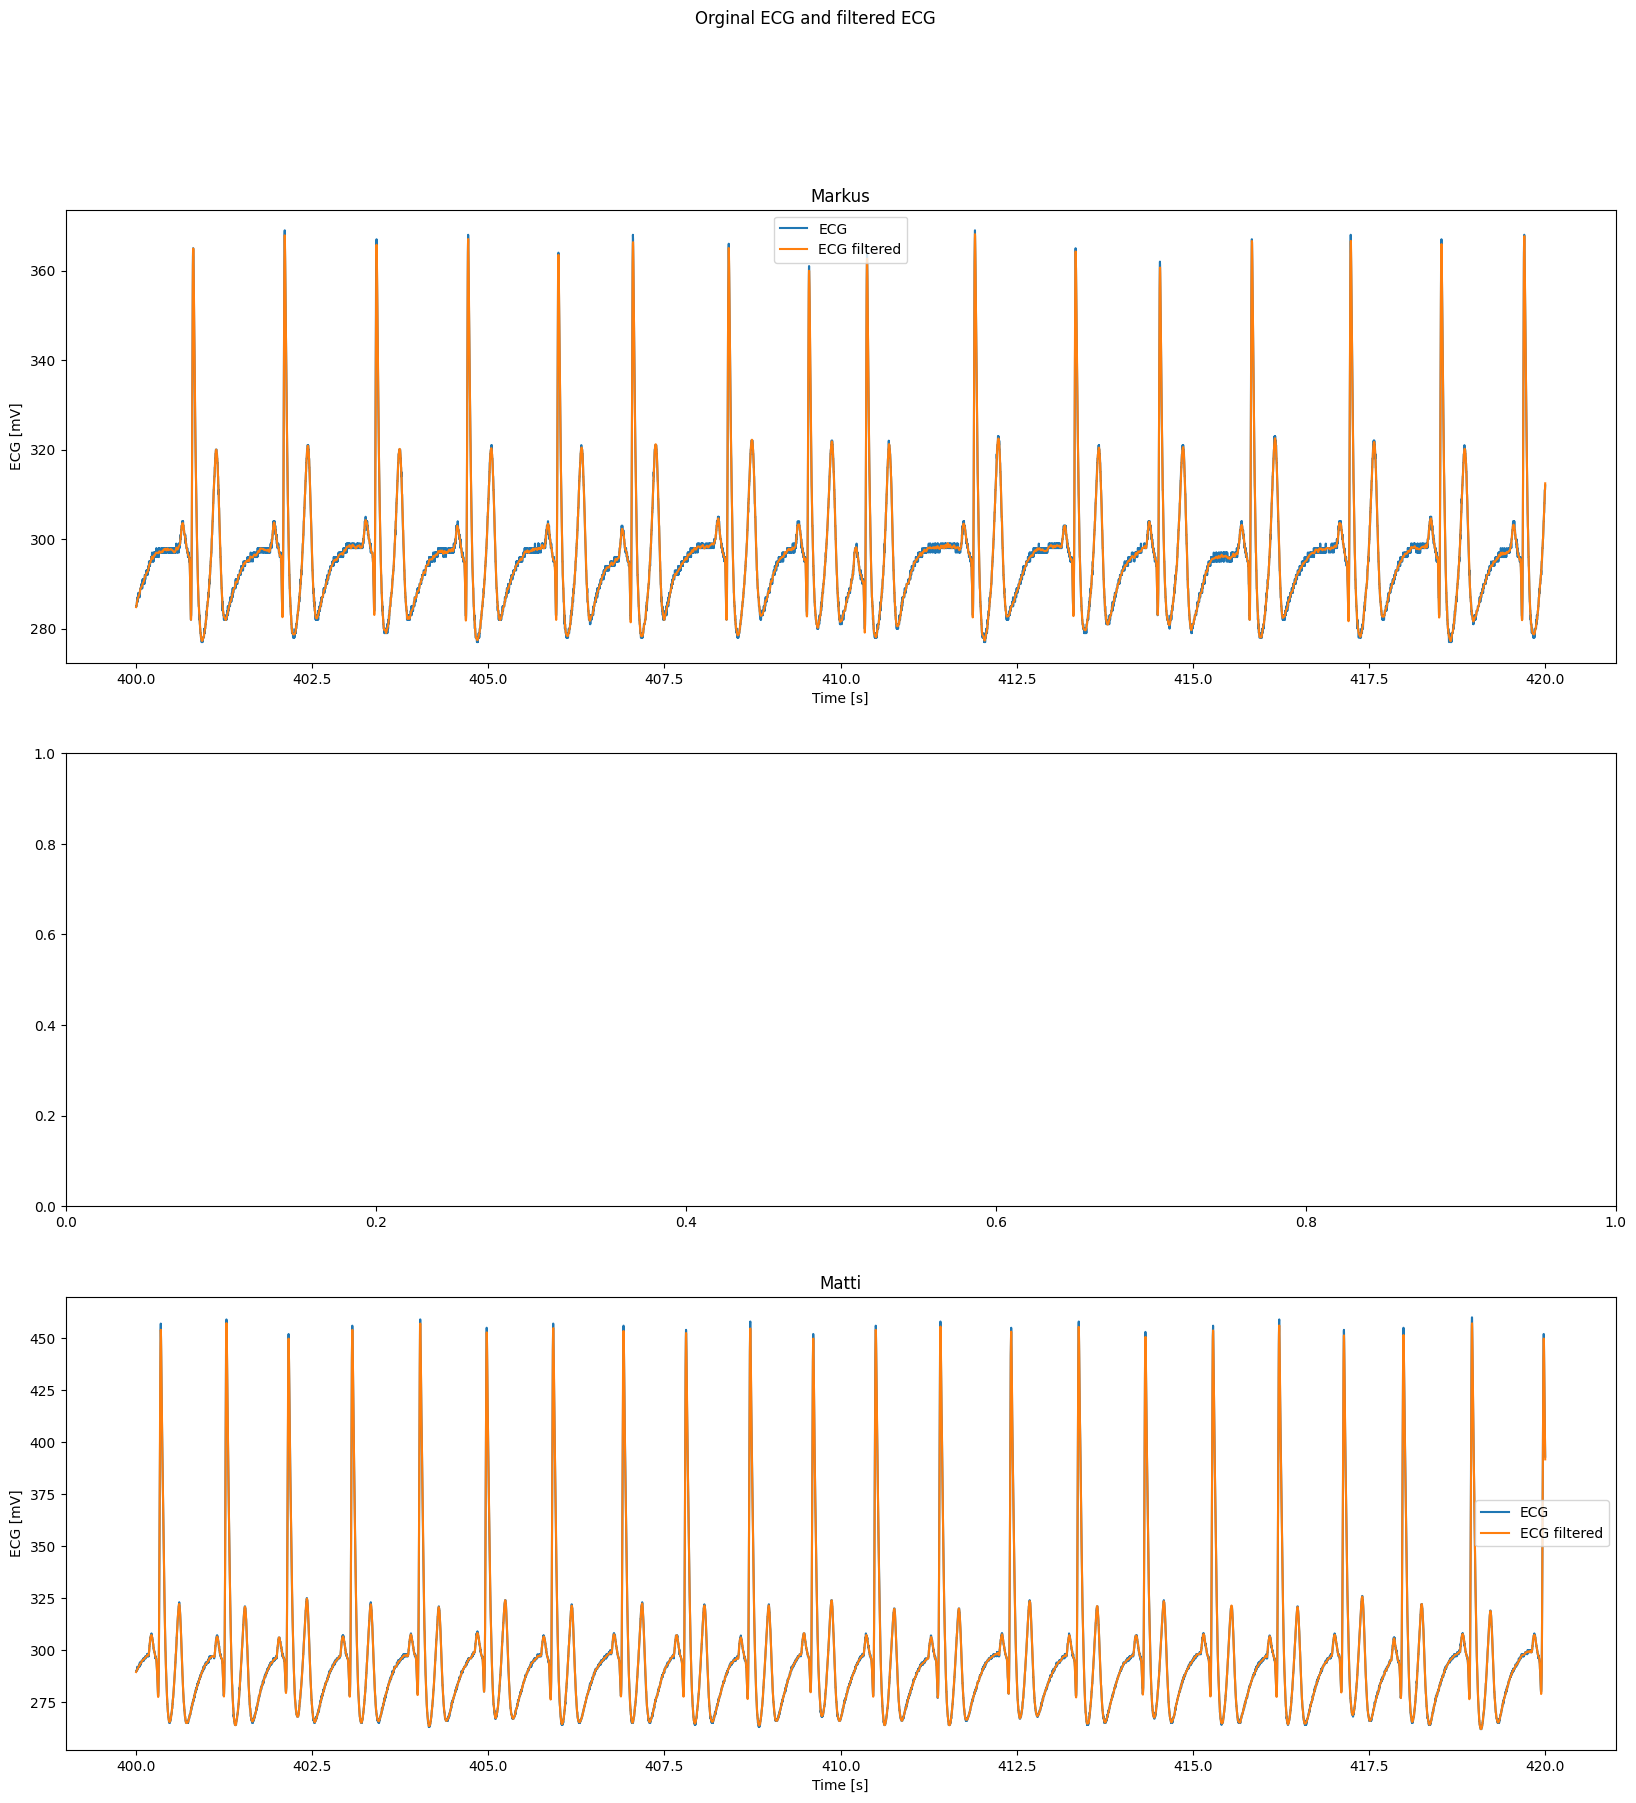

In [13]:
time_plot = np.where(np.logical_and(time_01 > 400 ,time_01 < 420))[0] #Zeitfenster des Plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
fig.suptitle('Orginal ECG and filtered ECG')
#Plotten Daten Markus
ax1.plot(time_01[time_plot], ecg_01[time_plot], label='ECG')
ax1.plot(time_01[time_plot], ecg_filtered_01[time_plot], label='ECG filtered')
ax1.set_title('Markus')
ax1.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax1.legend()
#Plotten Daten Matti
ax3.plot(time_03[time_plot], ecg_03[time_plot], label='ECG')
ax3.plot(time_03[time_plot], ecg_filtered_03[time_plot], label='ECG filtered')
ax3.set_title('Matti')
ax3.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax3.legend()

## Identifizieren der R-Zacke
Wichtig beim zweiten Plot muss die Linie fürn Threshold so knapp wie möglich unter den oberen Peaks liegen

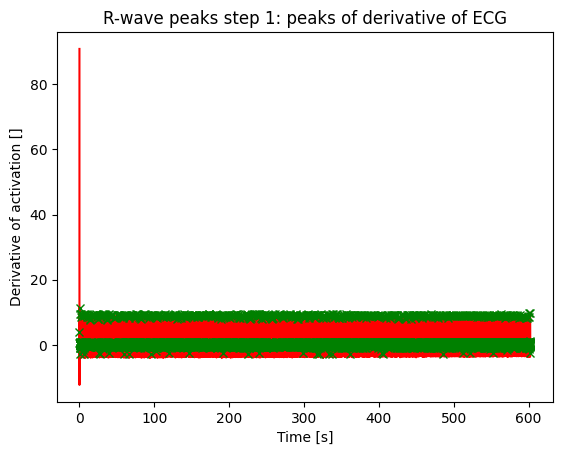

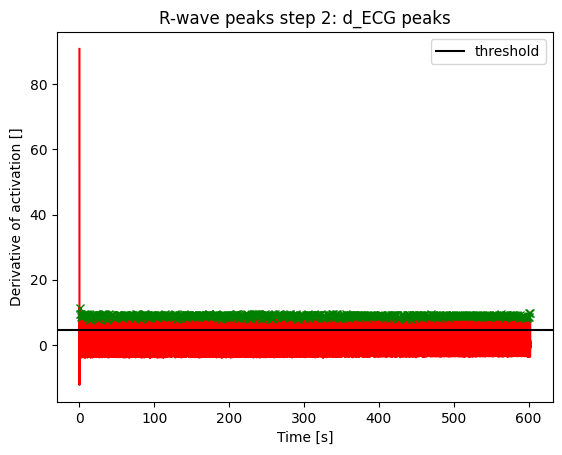

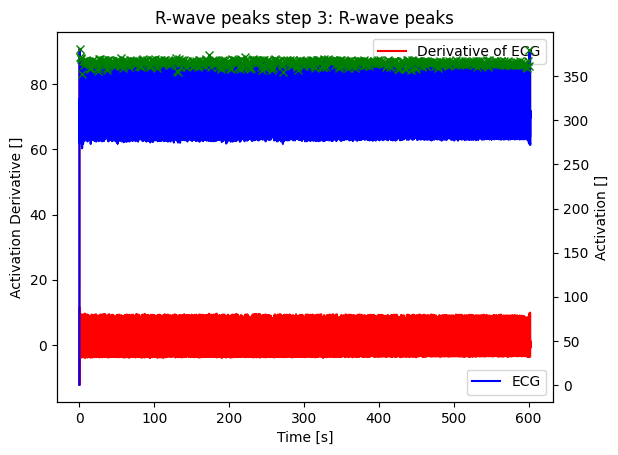

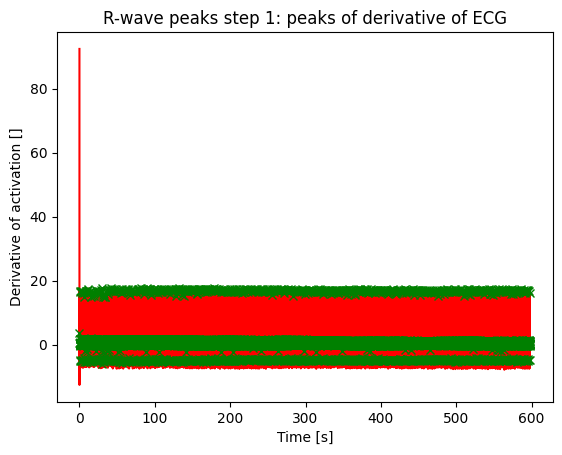

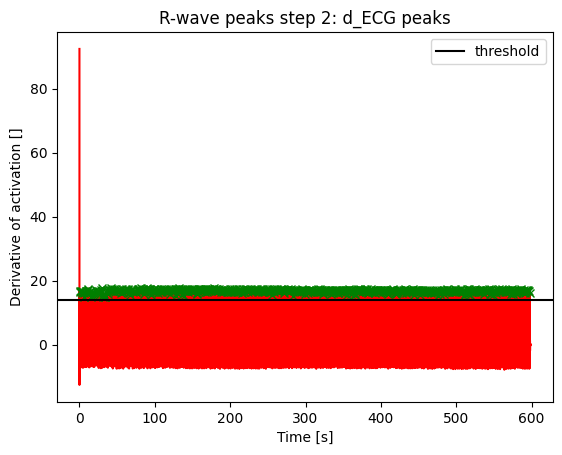

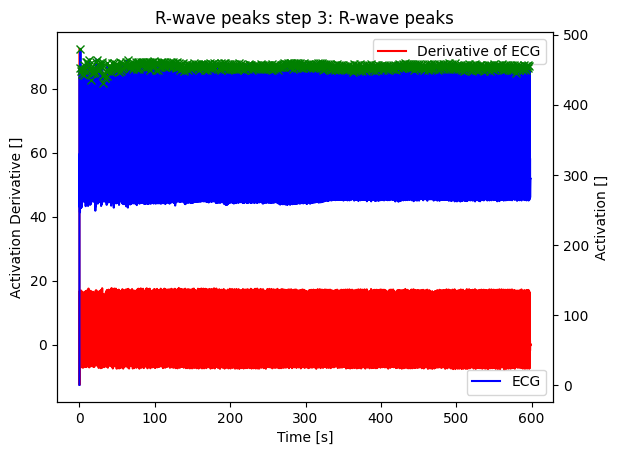

In [169]:
#Markus
d_ecg_01, peaks_d_ecg_01 = ekg.decg_peaks(ecg_filtered_01, time_01)
Rwave_peaks_d_ecg_01 = ekg.d_ecg_peaks(d_ecg_01, peaks_d_ecg_01, time_01, 0.1, 0.4)
Rwave_t_01 = ekg.Rwave_peaks(ecg_filtered_01, d_ecg_01, Rwave_peaks_d_ecg_01, time_01)

#Matti
d_ecg_03, peaks_d_ecg_03 = ekg.decg_peaks(ecg_filtered_03, time_03)
Rwave_peaks_d_ecg_03 = ekg.d_ecg_peaks(d_ecg_03, peaks_d_ecg_03, time_03, 0.3, 0.4)
Rwave_t_03 = ekg.Rwave_peaks(ecg_filtered_03, d_ecg_03, Rwave_peaks_d_ecg_03, time_03)

## Aufgabe 5
Nur eines Nötig

Text(0.5, 0, 'Time [s]')

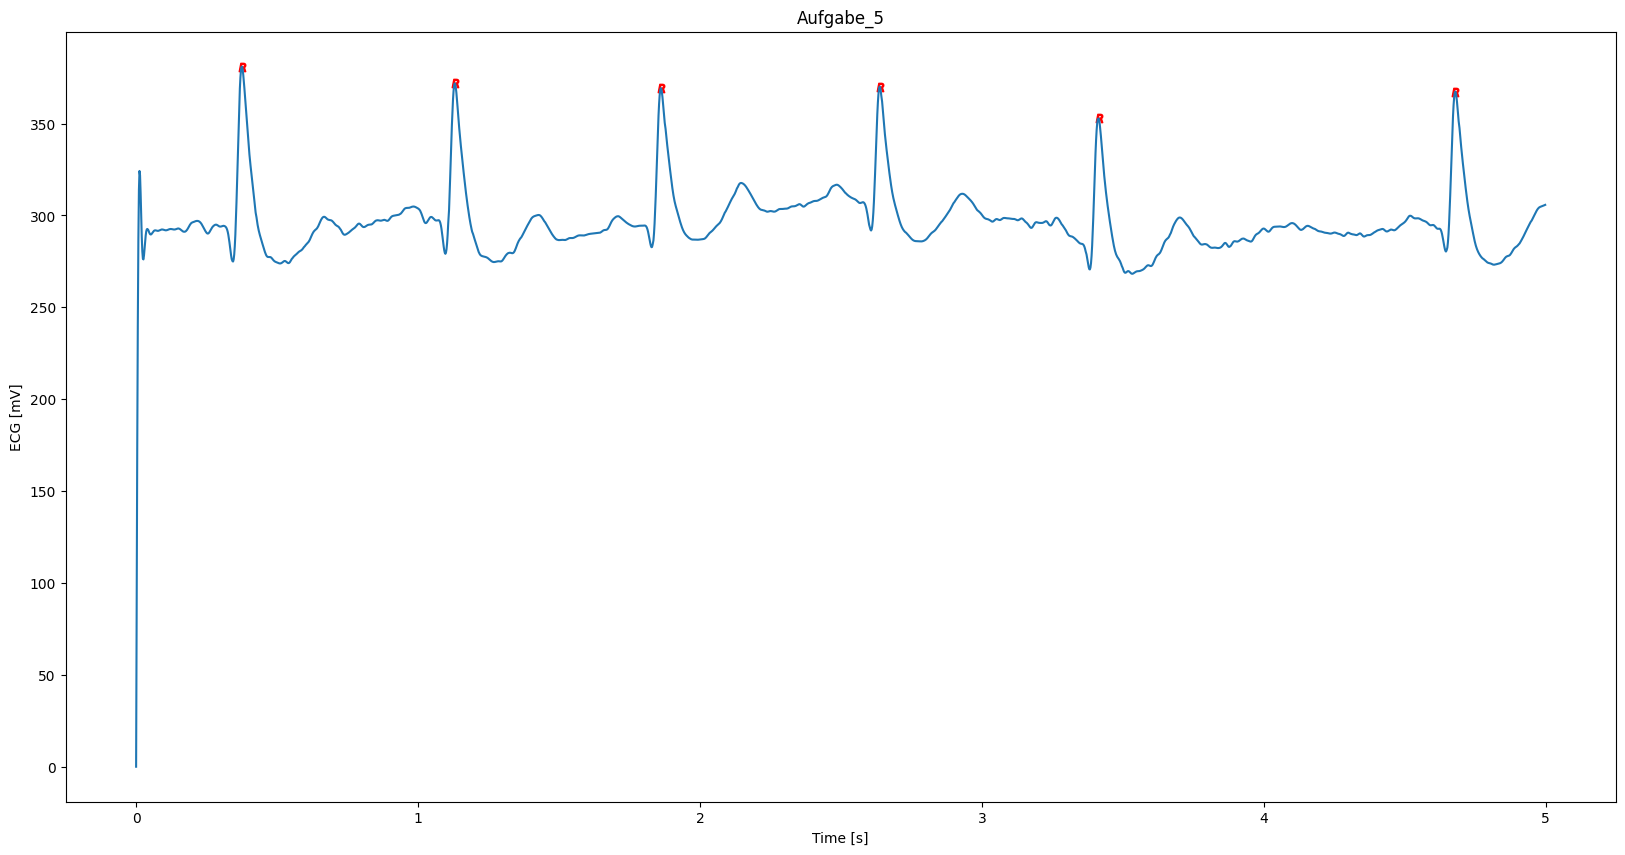

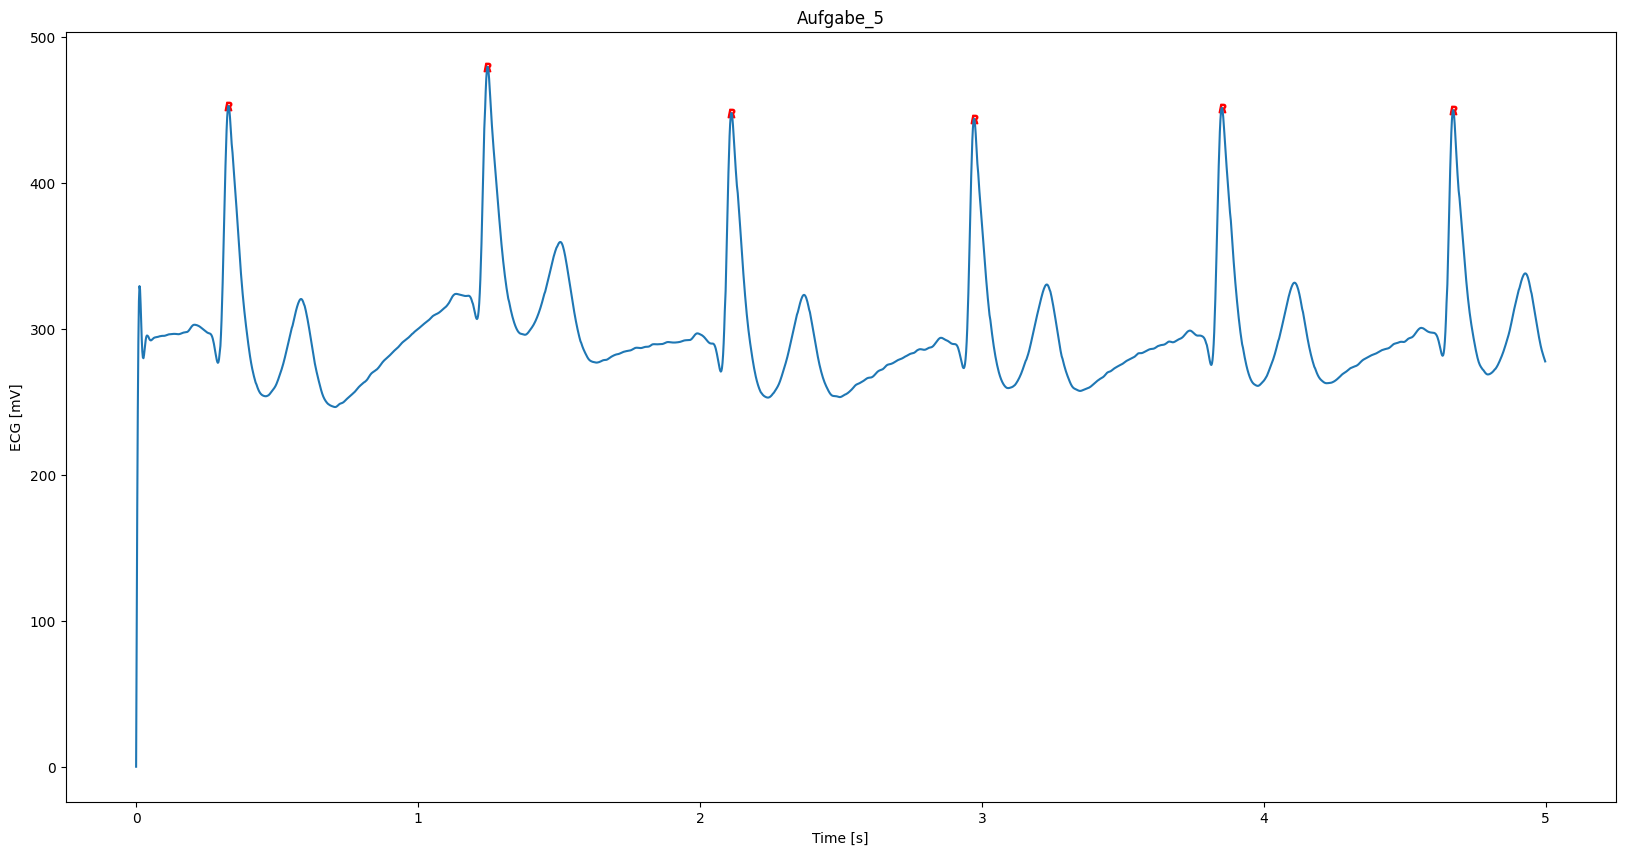

In [175]:
#Markus
time_plot = np.where(time_01 < 5)[0]
rtime_plot = np.array([]).astype(int)
for rtime in Rwave_t_01[Rwave_t_01 < 5]: # Bestimmen der Indexe in der Ursprungszeitreihe
    rtime_plot = np.append(rtime_plot, np.where(time_01 == rtime)[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(time_01[time_plot], ecg_filtered_01[time_plot])
ax.scatter(time_01[rtime_plot], ecg_filtered_01[rtime_plot], color='red', marker='$R$', label='R-wave')
ax.set_title('Aufgabe_5')
ax.set_ylabel('ECG [mV]')
ax.set_xlabel('Time [s]')

#Matti
time_plot = np.where(time_03 < 5)[0]
rtime_plot = np.array([]).astype(int)
for rtime in Rwave_t_03[Rwave_t_03 < 5]: # Bestimmen der Indexe in der Ursprungszeitreihe
    rtime_plot = np.append(rtime_plot, np.where(time_03 == rtime)[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(time_03[time_plot], ecg_filtered_03[time_plot])
ax.scatter(time_03[rtime_plot], ecg_filtered_03[rtime_plot], color='red', marker='$R$', label='R-wave')
ax.set_title('Aufgabe_5')
ax.set_ylabel('ECG [mV]')
ax.set_xlabel('Time [s]')


## Aufgabe 6

In [174]:
#Markus Puls und HRV
puls_time_01 = np.diff(Rwave_t_01)
puls_mean_01 = 1 / np.mean(puls_time_01) * 60
puls_hrv_01 = np.std(puls_time_01) *1000

#Matti Puls und HRV
puls_time_03 = np.diff(Rwave_t_03)
puls_mean_03 = 1 / np.mean(puls_time_03) * 60
puls_hrv_03 = np.std(puls_time_03) *1000

#Tabelle erstellen
data = {'Puls / 1/min': [puls_mean_01, puls_mean_03], 'HRV / ms': [puls_hrv_01, puls_hrv_03]}
table = pd.DataFrame(data, index=['Markus', 'Matti'])
print(table)

        Puls / 1/min    HRV / ms
Markus     53.425205  221.168844
Matti      63.278299   58.248464


### Peaks nur mit find.peaks()
Mit Funktionen aus Lab2Funkction.py --> gleiches Ergebniss

In [161]:
peaks = sps.find_peaks(ecg_filtered_01, prominence = 70, distance=1) # Peaks stimmen mit dieser Funktion
peaks_time = np.array(time_01[peaks[0]])
mean_puls = 1 / np.mean(np.diff(peaks_time)) * 60
hrv = np.std(np.diff(peaks_time)) * 1000
print(mean_puls, hrv)

53.45335961678462 221.3856449623345
